<a href="https://colab.research.google.com/github/aryanKamat007/Python-Machine-learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Pre-processing Step
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#importing datasets
df= pd.read_csv('iris.csv')
df.head()

print(df.shape)

(150, 5)


In [ ]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

le=LabelEncoder()
y=le.fit_transform(y)

print(x)
print(y)

print(x.shape)
print(y.shape)

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

print(x_train)
print(x_test)



In [ ]:
#Training the model
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

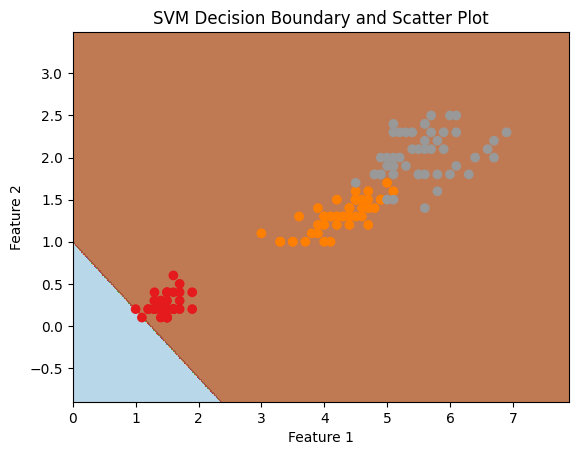

In [ ]:
# Create a meshgrid to plot decision boundaries
xx, yy = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                     np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot for the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Scatter plot of the data points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Scatter Plot')
plt.show()